In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sb

import datasets

In [59]:

data_x1 = pd.read_csv("spectrum_x/spectrum_doos_x_1.csv")
data_x2 = pd.read_csv("spectrum_x/spectrum_doos_x_2.csv")
data_x3 = pd.read_csv("spectrum_x/spectrum_doos_x_3.csv")
data_x4 = pd.read_csv("spectrum_x/spectrum_doos_x_4.csv")
data_x5 = pd.read_csv("spectrum_x/spectrum_doos_x_5.csv")
data_source = pd.read_csv("calibration_and_background/spectrum_source.csv")
data_background = pd.read_csv("calibration_and_background/spectrum_background.csv")

data_y1 = pd.read_csv("spectrum_y/spectrum_doos_y_1.csv")
data_y2 = pd.read_csv("spectrum_y/spectrum_doos_y_2.csv")
data_y3 = pd.read_csv("spectrum_y/spectrum_doos_y_3.csv")
data_y4 = pd.read_csv("spectrum_y/spectrum_doos_y_4.csv")

In [60]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 207.834 and i < 215.690:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

def remove_background(dataset, dataset_2):
    data = []
    
    for i, j in zip(dataset, dataset_2):
        x = i - j
        data.append(x)
    
    return data

def add_counts(dataset_1, dataset_2):
    total_counts = []
    
    for i, j in zip(dataset_1, dataset_2):
        total_counts.append(i + j)
        
    return total_counts

def scaling(dataset, scaling_factor):
    data = []
    for i in dataset:
        data.append(i * scaling_factor)
    return data

split datasets into lists

In [61]:
pulseheights_background = data_background["pulseheight"]
counts_background_A = data_background["counts_ch_A"]
counts_background_B = data_background["counts_ch_B"]
counts_tot_background = add_counts(counts_background_A, counts_background_B)

counts_A_x1 = remove_background(data_x1["counts_ch_A"], counts_background_A)
counts_B_x1 = remove_background(data_x1["counts_ch_B"], counts_background_B)
counts_total_x1 = add_counts(counts_A_x1, counts_B_x1)

counts_A_x2 = remove_background(data_x2["counts_ch_A"], counts_background_A)
counts_B_x2 = remove_background(data_x2["counts_ch_B"], counts_background_B)
counts_total_x2 = add_counts(counts_A_x2, counts_B_x2)

counts_A_x3 = remove_background(data_x3["counts_ch_A"], counts_background_A)
counts_B_x3 = remove_background(data_x3["counts_ch_B"], counts_background_B)
counts_total_x3 = add_counts(counts_A_x3, counts_B_x3)

counts_A_x4 = remove_background(data_x4["counts_ch_A"], counts_background_A)
counts_B_x4 = remove_background(data_x4["counts_ch_B"], counts_background_B)
counts_total_x4 = add_counts(counts_A_x4, counts_B_x4)

counts_A_x5 = remove_background(data_x5["counts_ch_A"], counts_background_A)
counts_B_x5 = remove_background(data_x5["counts_ch_B"], counts_background_B)
counts_total_x5 = add_counts(counts_A_x5, counts_B_x5)

pulseheights = data_source["pulseheight"]
counts_A_source = remove_background(data_source["counts_ch_A"], counts_background_A)
counts_B_source = remove_background(data_source["counts_ch_B"], counts_background_B)
counts_total_source = add_counts(counts_A_source, counts_B_source)


In [62]:

counts_A_y1 = remove_background(data_y1["counts_ch_A"], counts_background_A)
counts_B_y1 = remove_background(data_y1["counts_ch_B"], counts_background_B)
counts_total_y1 = add_counts(counts_A_y1, counts_B_y1)

counts_A_y2 = remove_background(data_y2["counts_ch_A"], counts_background_A)
counts_B_y2 = remove_background(data_y2["counts_ch_B"], counts_background_B)
counts_total_y2 = add_counts(counts_A_y2, counts_B_y2)

counts_A_y3 = remove_background(data_y3["counts_ch_A"], counts_background_A)
counts_B_y3 = remove_background(data_y3["counts_ch_B"], counts_background_B)
counts_total_y3 = add_counts(counts_A_y3, counts_B_y3)

counts_A_y4 = remove_background(data_y4["counts_ch_A"], counts_background_A)
counts_B_y4 = remove_background(data_y4["counts_ch_B"], counts_background_B)
counts_total_y4 = add_counts(counts_A_y4, counts_B_y4)

In [63]:
scaling_factor = max(counts_A_source) / max(counts_B_source)

In [64]:
counts_B_x1 = scaling(counts_B_x1, scaling_factor)
counts_B_x2 = scaling(counts_B_x2, scaling_factor)
counts_B_x3 = scaling(counts_B_x3, scaling_factor)
counts_B_x4 = scaling(counts_B_x4, scaling_factor)
counts_B_x5 = scaling(counts_B_x5, scaling_factor)

counts_B_y1 = scaling(counts_B_y1, scaling_factor)
counts_B_y2 = scaling(counts_B_y2, scaling_factor)
counts_B_y3 = scaling(counts_B_y3, scaling_factor)
counts_B_y4 = scaling(counts_B_y4, scaling_factor)

counts_B_source = scaling(counts_B_source, scaling_factor)

In [65]:

# plt.plot(pulseheights_background, counts_background_A, color ='red', label = 'channel A')
# plt.plot(pulseheights_background, counts_background_B, color = 'blue', label = 'channel B')
# plt.gca().set_facecolor('lightgrey')
# plt.title("Background radiation")
# plt.legend(loc = 'upper right')
# plt.ylabel("counts")
# plt.xlabel("pulseheights (mV)")
# plt.show()

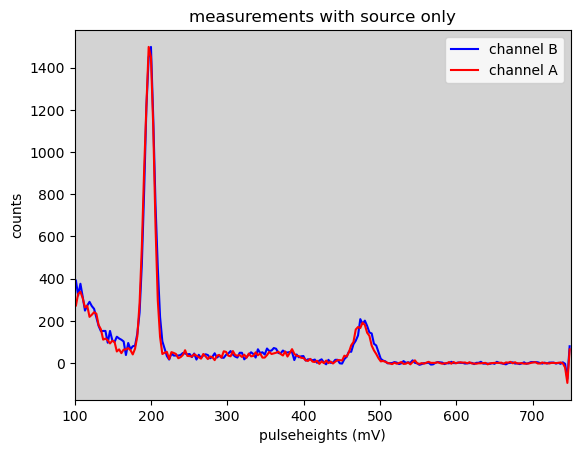

In [66]:
plt.plot(pulseheights, counts_B_source, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_source, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()


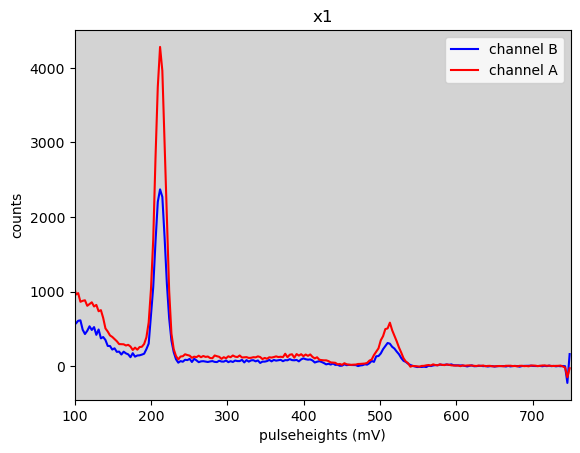

In [67]:
plt.plot(pulseheights, counts_B_x1, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x1")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

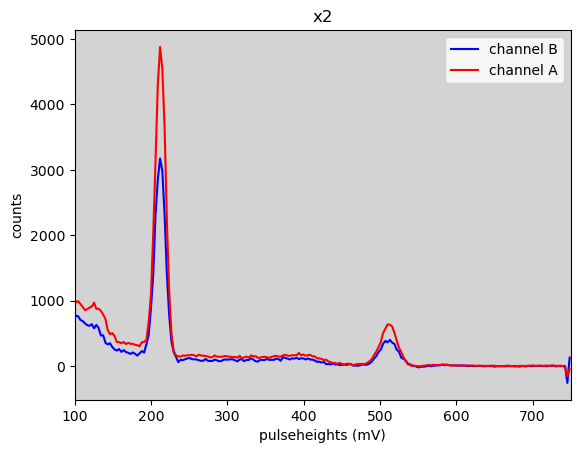

In [68]:
plt.plot(pulseheights, counts_B_x2, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x2")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

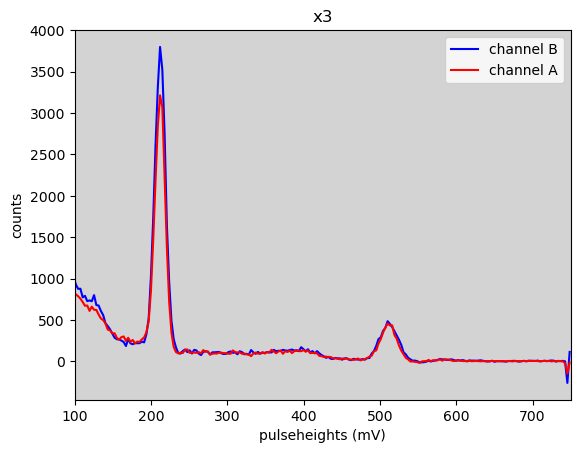

In [69]:
plt.plot(pulseheights, counts_B_x3, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x3")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

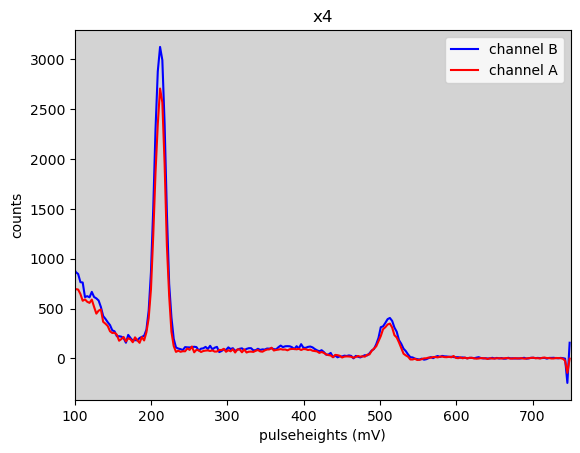

In [70]:
plt.plot(pulseheights, counts_B_x4, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x4")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

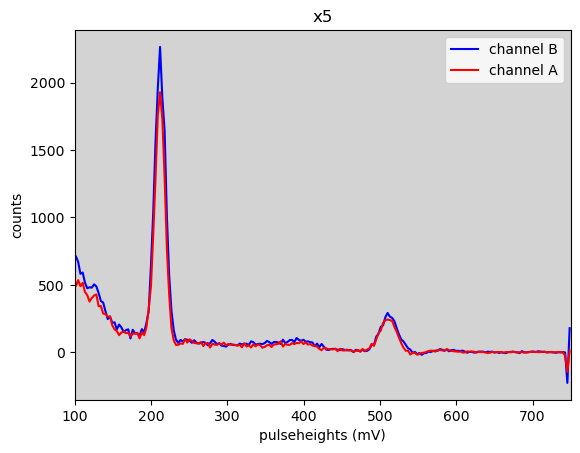

In [71]:
plt.plot(pulseheights, counts_B_x5, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x5, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x5")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

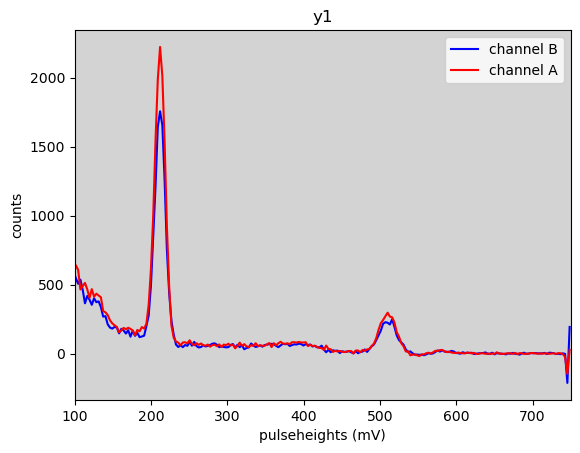

In [72]:
plt.plot(pulseheights, counts_B_y1, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y1")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

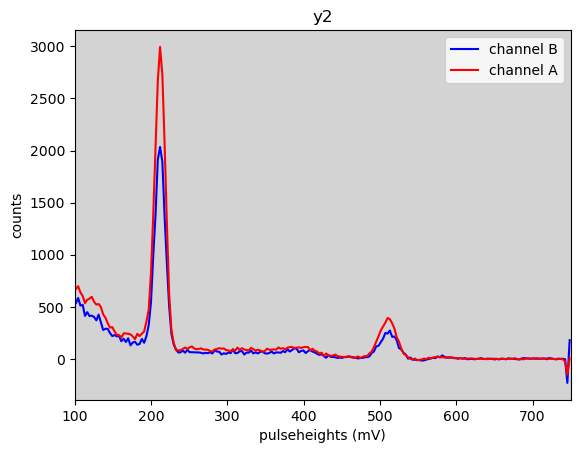

In [73]:
plt.plot(pulseheights, counts_B_y2, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y2")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

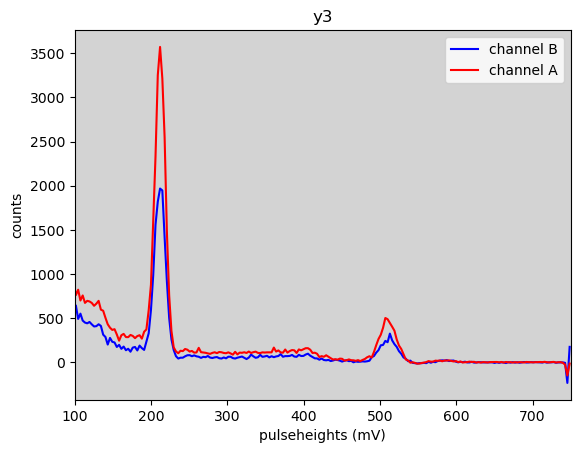

In [74]:
plt.plot(pulseheights, counts_B_y3, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y3")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

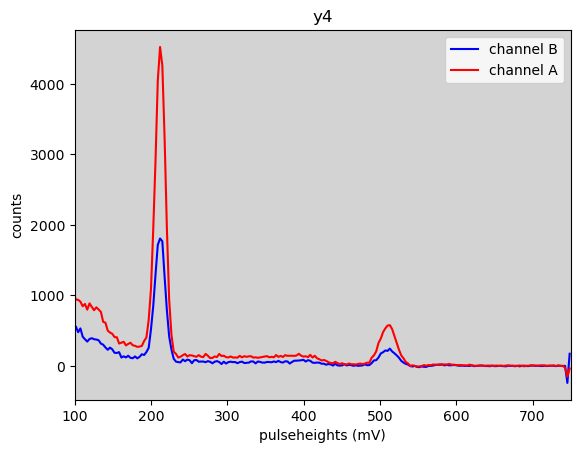

In [75]:
plt.plot(pulseheights, counts_B_y4, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y4")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

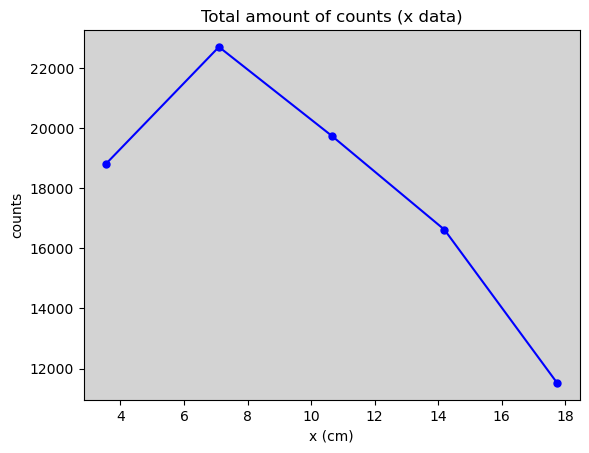

In [76]:
x_loc = [3.55, 7.1, 10.65, 14.2, 17.75]

_, counts_A_x1 = adjust(pulseheights, counts_A_x1)
_, counts_B_x1 = adjust(pulseheights, counts_B_x1)
_, counts_A_x2 = adjust(pulseheights, counts_A_x2)
_, counts_B_x2 = adjust(pulseheights, counts_B_x2)
_, counts_A_x3 = adjust(pulseheights, counts_A_x3)
_, counts_B_x3 = adjust(pulseheights, counts_B_x3)
_, counts_A_x4 = adjust(pulseheights, counts_A_x4)
_, counts_B_x4 = adjust(pulseheights, counts_B_x4)
_, counts_A_x5 = adjust(pulseheights, counts_A_x5)
_, counts_B_x5 = adjust(pulseheights, counts_B_x5)

x1_counts = [sum(counts_A_x1) + sum(counts_B_x1)]
x2_counts = [sum(counts_A_x2) + sum(counts_B_x2)]
x3_counts = [sum(counts_A_x3) + sum(counts_B_x3)]
x4_counts = [sum(counts_A_x4) + sum(counts_B_x4)]
x5_counts = [sum(counts_A_x5) + sum(counts_B_x5)]
x_counts = [x1_counts, x2_counts, x3_counts, x4_counts, x5_counts]

plt.plot(x_loc, x_counts, 'o-', markersize = 5, color = 'blue')

plt.gca().set_facecolor('lightgrey')
plt.title("Total amount of counts (x data)")
plt.ylabel("counts")
plt.xlabel("x (cm)")
plt.show()

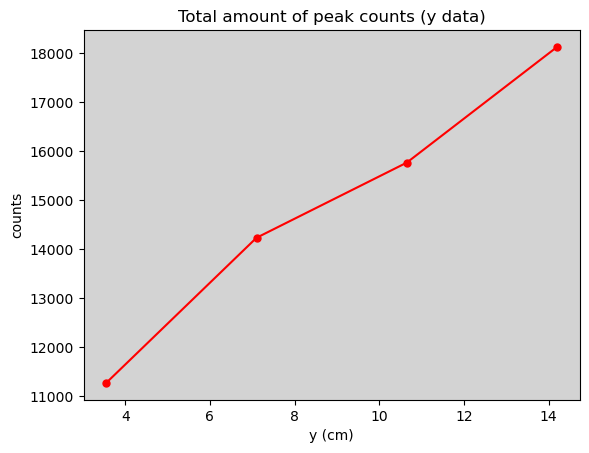

In [77]:
y_loc = [3.55, 7.1, 10.65, 14.2]

_, counts_A_y1 = adjust(pulseheights, counts_A_y1)
_, counts_B_y1 = adjust(pulseheights, counts_B_y1)
_, counts_A_y2 = adjust(pulseheights, counts_A_y2)
_, counts_B_y2 = adjust(pulseheights, counts_B_y2)
_, counts_A_y3 = adjust(pulseheights, counts_A_y3)
_, counts_B_y3 = adjust(pulseheights, counts_B_y3)
_, counts_A_y4 = adjust(pulseheights, counts_A_y4)
_, counts_B_y4 = adjust(pulseheights, counts_B_y4)

y1_counts = [sum(counts_A_y1) + sum(counts_B_y1)]
y2_counts = [sum(counts_A_y2) + sum(counts_B_y2)]
y3_counts = [sum(counts_A_y3) + sum(counts_B_y3)]
y4_counts = [sum(counts_A_y4) + sum(counts_B_y4)]

y_counts = [y1_counts, y2_counts, y3_counts, y4_counts]

plt.plot(y_loc, y_counts, 'o-', markersize = 5, color = 'red')

plt.gca().set_facecolor('lightgrey')
plt.title("Total amount of peak counts (y data)")
plt.ylabel("counts")
plt.xlabel("y (cm)")
plt.show()

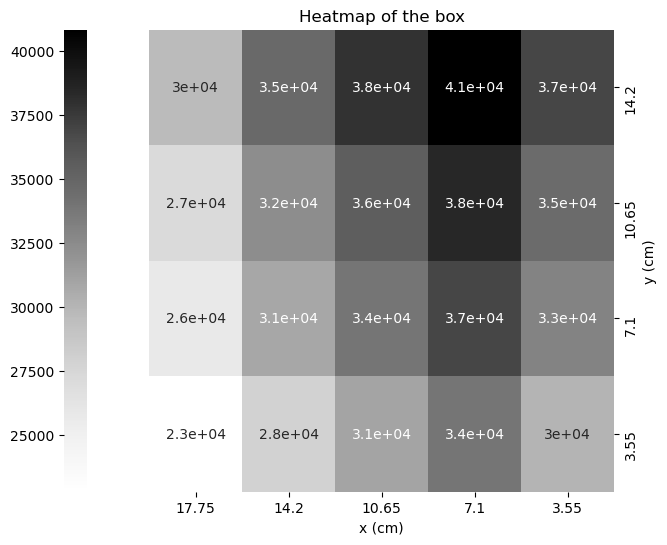

In [78]:
x_positions = np.array([3.55, 7.1, 10.65, 14.2, 17.75]) 
y_positions = np.array([3.55, 7.1, 10.65, 14.2]) 
counts = np.array([
    [x1_counts[0] + y1_counts[0], x2_counts[0] + y1_counts[0], x3_counts[0] + y1_counts[0], 
     x4_counts[0] + y1_counts[0], x5_counts[0] + y1_counts[0]],  
    [x1_counts[0] + y2_counts[0], x2_counts[0] + y2_counts[0], x3_counts[0] + y2_counts[0], x4_counts[0]
     + y2_counts[0], x5_counts[0] + y2_counts[0]],  
    [x1_counts[0] + y3_counts[0], x2_counts[0] + y3_counts[0], x3_counts[0] + y3_counts[0], x4_counts[0]
     + y3_counts[0], x5_counts[0] + y3_counts[0]],  
    [x1_counts[0] + y4_counts[0], x2_counts[0] + y4_counts[0], x3_counts[0] + y4_counts[0], x4_counts[0]
     + y4_counts[0], x5_counts[0] + y4_counts[0]] 
])

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()


In [79]:
_, counts_A_source = adjust(pulseheights, counts_A_source)
_, counts_B_source = adjust(pulseheights, counts_B_source)

print(sum(counts_A_source) + sum(counts_B_source))

1239.7712470214456


In [ ]:
counts_source =  (x2_counts[0] + y4_counts[0]) / 1000 #kilo counts
counts_source_box = []

rx_positions = [-3.55, 0, 3.55, 7.1, 10.65]
ry_positions = [10.65, 7.1, 3.55, 0]

for y in ry_positions:
    for x in rx_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_source_box.append(counts_source ** 2 / (r ** 2 + counts_source))

counts_source_box = np.array(counts_source_box)
counts_source_box = np.array(counts_source_box).reshape(4, 5)

In [81]:
counts_kilo = []

for i in counts:
    counts_kilo.append(i / 1000)
counts_kilo = np.array(counts_kilo)

In [82]:
counts = counts_kilo - counts_source_box
counts = np.array(counts)

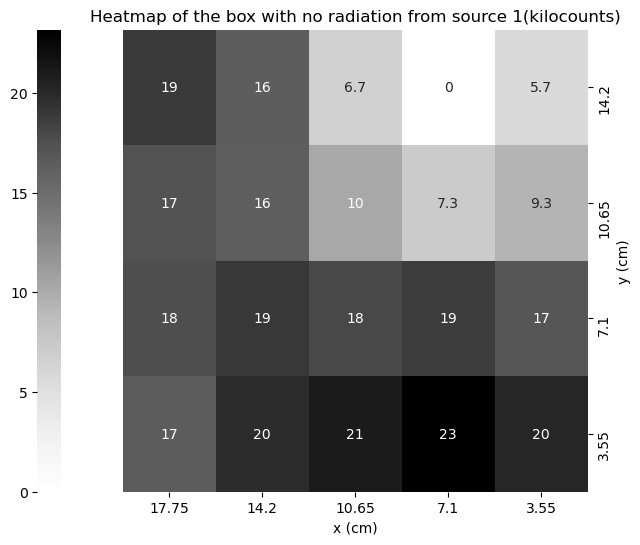

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

In [ ]:
counts_source_1 =  23 # kilo counts
counts_1 = []
counts_source_2 =  19 # kilo counts
counts_2 = []

r1x_positions = [-3.55, 0, 3.55, 7.1, 10.65]
r1y_positions = [0, 3.55, 7.1, 10.65]
r2x_positions = [-10.65, -7.1, -3.55, 0, 3.55]
r2y_positions = [-3.55, 0, 3.55, 7.1]

for y in r1y_positions:
    for x in r1x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_1.append(counts_source_1 ** 2 / (r ** 2 + counts_source_1))

for y in r2y_positions:
    for x in r2x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_2.append(counts_source_2 ** 2 / (r ** 2 + counts_source_2))

counts_1 = np.array(counts_1)
counts_1 = np.array(counts_1).reshape(4, 5)

counts_2 = np.array(counts_2)
counts_2 = np.array(counts_2).reshape(4, 5)

counts = counts_1 + counts_2

[[17.34773312 27.40176802 23.02500413 18.62924961 12.04415648]
 [13.70008818 20.05948681 22.39711226 25.15026886 14.97288688]
 [ 8.63949485 11.60787073 14.31676586 15.69547771 10.99791017]
 [ 5.52422482  6.89051209  7.951508    8.03239285  6.51908076]]


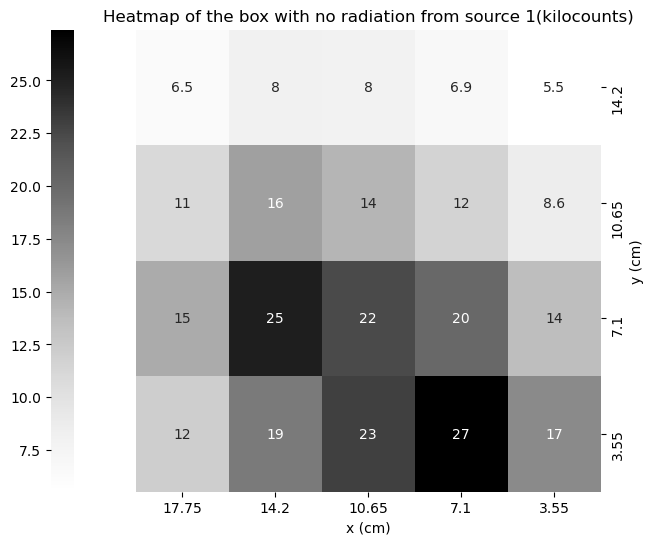

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

In [86]:
counts_source_1 =  23 # kilo counts
counts_1 = []
counts_source_2 =  19 # kilo counts
counts_2 = []

r1x_positions = [-3.55, 0, 3.55, 7.1, 10.65]
r1y_positions = [0, 3.55, 7.1, 10.65]
r2x_positions = [-14.2, -10.65, -7.1, -3.55, 0]
r2y_positions = [-10.65, -7.1, -3.55, 0]

for y in r1y_positions:
    for x in r1x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_1.append(counts_source_1 ** 2 / (r ** 2 + counts_source_1))

for y in r2y_positions:
    for x in r2x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_2.append(counts_source_2 ** 2 / (r ** 2 + counts_source_2))

counts_1 = np.array(counts_1)
counts_1 = np.array(counts_1).reshape(4, 5)

counts_2 = np.array(counts_2)
counts_2 = np.array(counts_2).reshape(4, 5)

counts = counts_1 + counts_2
print(counts)

[[15.93914324 24.46840489 16.83299197  9.69532871  6.6037823 ]
 [12.30582295 16.83299197 13.98681797 10.55203688  8.75071966]
 [ 7.69801423  9.69532871 10.55203688 12.43882781 14.25456007]
 [ 5.18588936  6.6037823   8.75071966 14.25456007 21.11731273]]


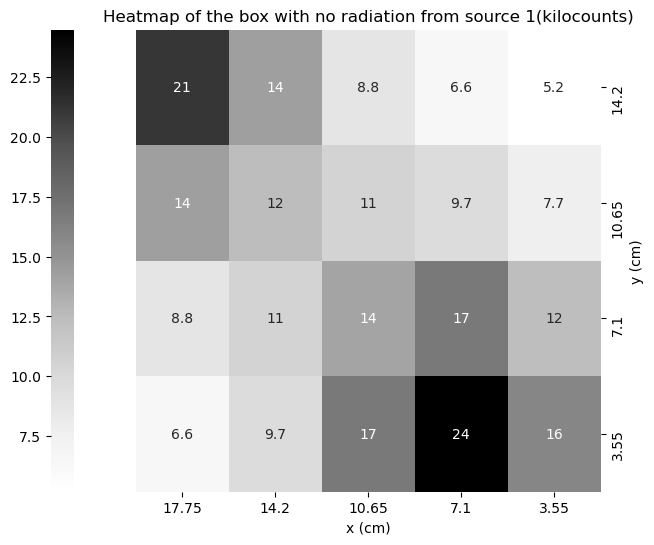

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()